<a href="https://colab.research.google.com/github/qu8411826/ML100-Days/blob/master/Homework/Day077_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [14]:
import os
import keras

# Check GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
train, test = keras.datasets.cifar10.load_data()

In [0]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=128, activation="relu")(input_layer)
#    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [19]:
model2 = build_mlp()
model2.summary()
optimizer = keras.optimizers.Adam(lr=0.001)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model2.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_45 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_46 (Dense)             (None, 10)                330       
Total params: 397,802
Trainable params: 397,802
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 102us/step - loss: 2.0243 - acc: 0.2538 - val_loss: 1.9230 - val_acc: 0.2952
Epoch 2/100
50000/50000 [==============================] - 4s 73us/step - loss:

NameError: ignored

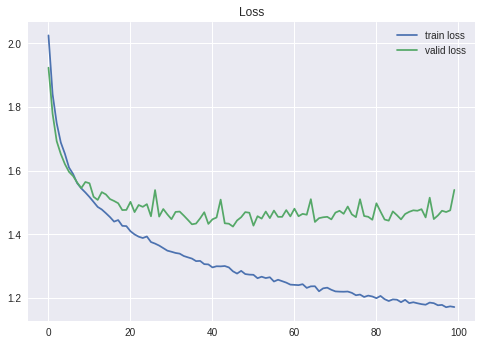

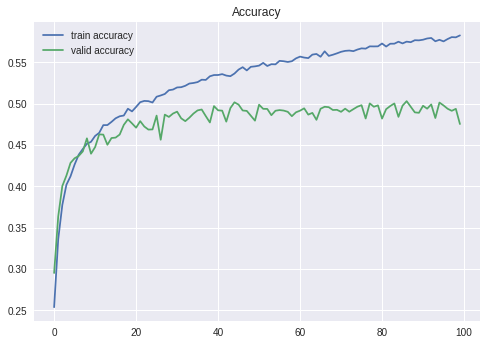

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss2)), train_loss2, label="train loss")
plt.plot(range(len(valid_loss2)), valid_loss2, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc2)), train_acc2, label="train accuracy")
plt.plot(range(len(valid_acc2)), valid_acc2, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_48 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                330       
Total params: 397,802
Trainable params: 397,802
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 9s 173us/step - loss: 2.1500 - acc: 0.2247 - val_loss: 2.0388 - val_acc: 0.2834
Epoch 2/200
50000/50000 [==============================] - 9s 176us/step - loss

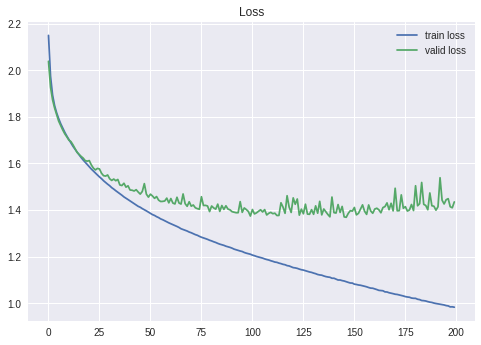

NameError: ignored

In [21]:
model3 = build_mlp()
model3.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model3.fit(x_train, y_train, 
          epochs=200, 
          batch_size=32, 
          validation_data=(x_test, y_test), 
          shuffle=True)
train_loss3 = model3.history.history["loss"]
valid_loss3 = model3.history.history["val_loss"]

train_acc3 = model3.history.history["acc"]
valid_acc3 = model3.history.history["val_acc"]

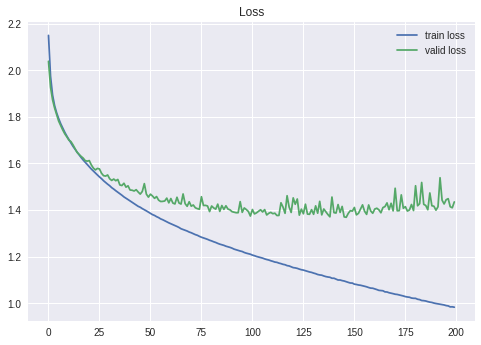

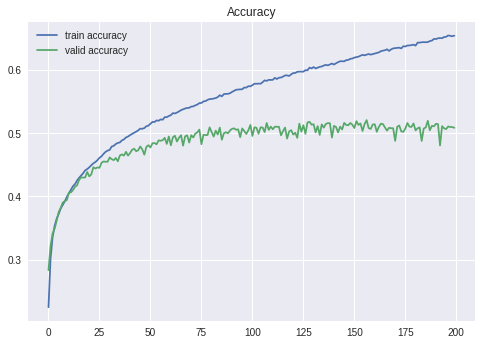

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss3)), train_loss3, label="train loss")
plt.plot(range(len(valid_loss3)), valid_loss3, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc3)), train_acc3, label="train accuracy")
plt.plot(range(len(valid_acc3)), valid_acc3, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()